In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [83]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [84]:
df.duplicated().sum()

763

In [85]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [86]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object


In [87]:
df.shape

(3577, 8)

In [88]:
cols=df.columns
cols

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [89]:
cat_cols=df.dtypes[df.dtypes=='object'].index
num_cols=df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


In [90]:
a =  df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.25,0.5,0.75,0.80,0.85,0.90,0.95,0.97,0.98,0.99]).T
a

,count,mean,std,min,1%,2%,3%,25%,50%,75%,80%,85%,90%,95%,97%,98%,99%,max
year,3577.0,2012.962538,4.251759,1992.0,2000.00,2003.0,2004.0,2010.0,2013.0,2016.0,2017.0,2017.0,2018.0,2019.0,2019.0,2019.0,2020.0,2020.0
selling_price,3577.0,473912.542074,509301.809816,20000.0,51786.64,60000.0,70000.0,200000.0,350000.0,600000.0,650000.0,750000.0,875000.0,1200000.0,1497200.0,1800000.0,2675000.0,8900000.0
km_driven,3577.0,69250.545709,47579.940016,1.0,1744.08,5000.0,6525.2,36000.0,60000.0,90000.0,100000.0,110000.0,120000.0,149534.8,170000.0,193440.0,223158.4,806599.0


In [91]:
df = df[(df['selling_price'] > 0) & (df['km_driven'] > 0)]
print(df.describe())

              year  selling_price      km_driven
count  3577.000000   3.577000e+03    3577.000000
mean   2012.962538   4.739125e+05   69250.545709
std       4.251759   5.093018e+05   47579.940016
min    1992.000000   2.000000e+04       1.000000
25%    2010.000000   2.000000e+05   36000.000000
50%    2013.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [92]:
print('Year : ',df.year.unique(),'\n')
print('fuel :', df.fuel.unique(), '\n')
print('Transmission : ', df.transmission.unique(), '\n')
print('seller Type: :', df.seller_type.unique(),'\n')
print('Owner :', df.owner.unique(), '\n')

Year :  [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992] 

fuel : ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric'] 

Transmission :  ['Manual' 'Automatic'] 

seller Type: : ['Individual' 'Dealer' 'Trustmark Dealer'] 

Owner : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car'] 



In [93]:
df['brand']=df['name'].str.split(expand=True)[0]
df['model']=df['name'].str.split(expand=True)[1]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


In [94]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [95]:
df['fuel_type'] = lb.fit_transform(df['fuel'])
df['Type_of_Seller'] = lb.fit_transform(df['seller_type'])
df['Transmit'] = lb.fit_transform(df['transmission'])
df['Owner_Type'] = lb.fit_transform(df['owner'])
df['brand_name'] = lb.fit_transform(df['brand'])
df['model_name'] = lb.fit_transform(df['model'])

In [96]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model,fuel_type,Type_of_Seller,Transmit,Owner_Type,brand_name,model_name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,4,1,1,0,18,6
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon,4,1,1,0,18,164
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,1,1,1,0,10,161
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO,4,1,1,0,5,125
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze,1,1,1,2,9,17


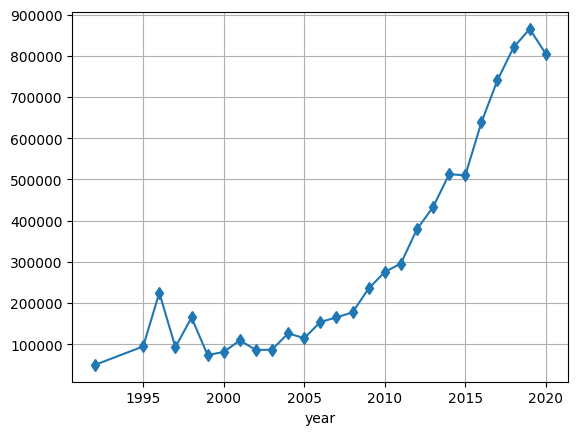

In [97]:
r1=df.groupby('year')['selling_price'].mean()
r1.plot(kind='line',marker='d')
plt.grid()
plt.show()

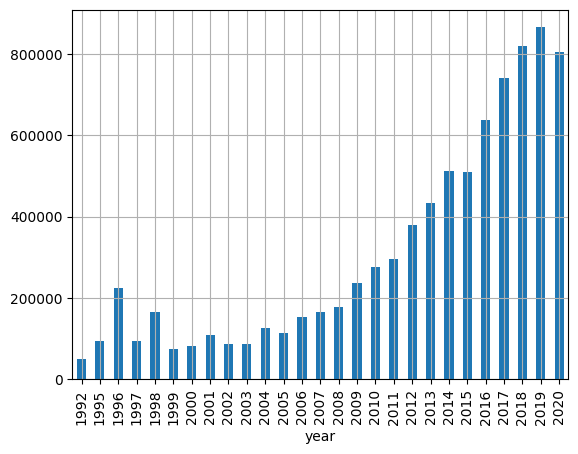

In [98]:
r1.plot(kind='bar')
plt.grid()
plt.show()

In [103]:
r2=df.groupby('brand')['selling_price'].mean()

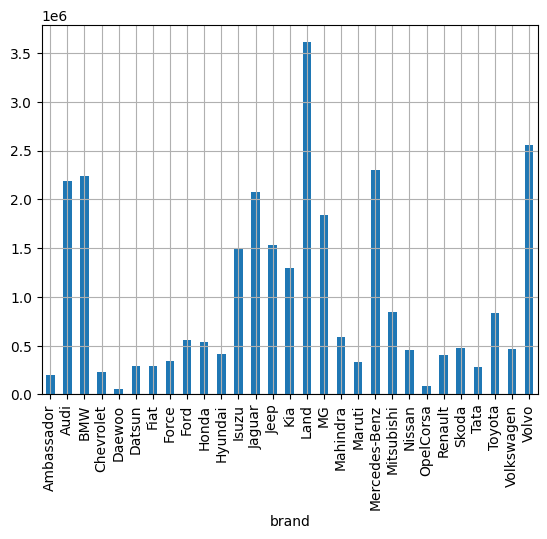

In [105]:
r2.plot(kind='bar')
plt.grid()
plt.show()

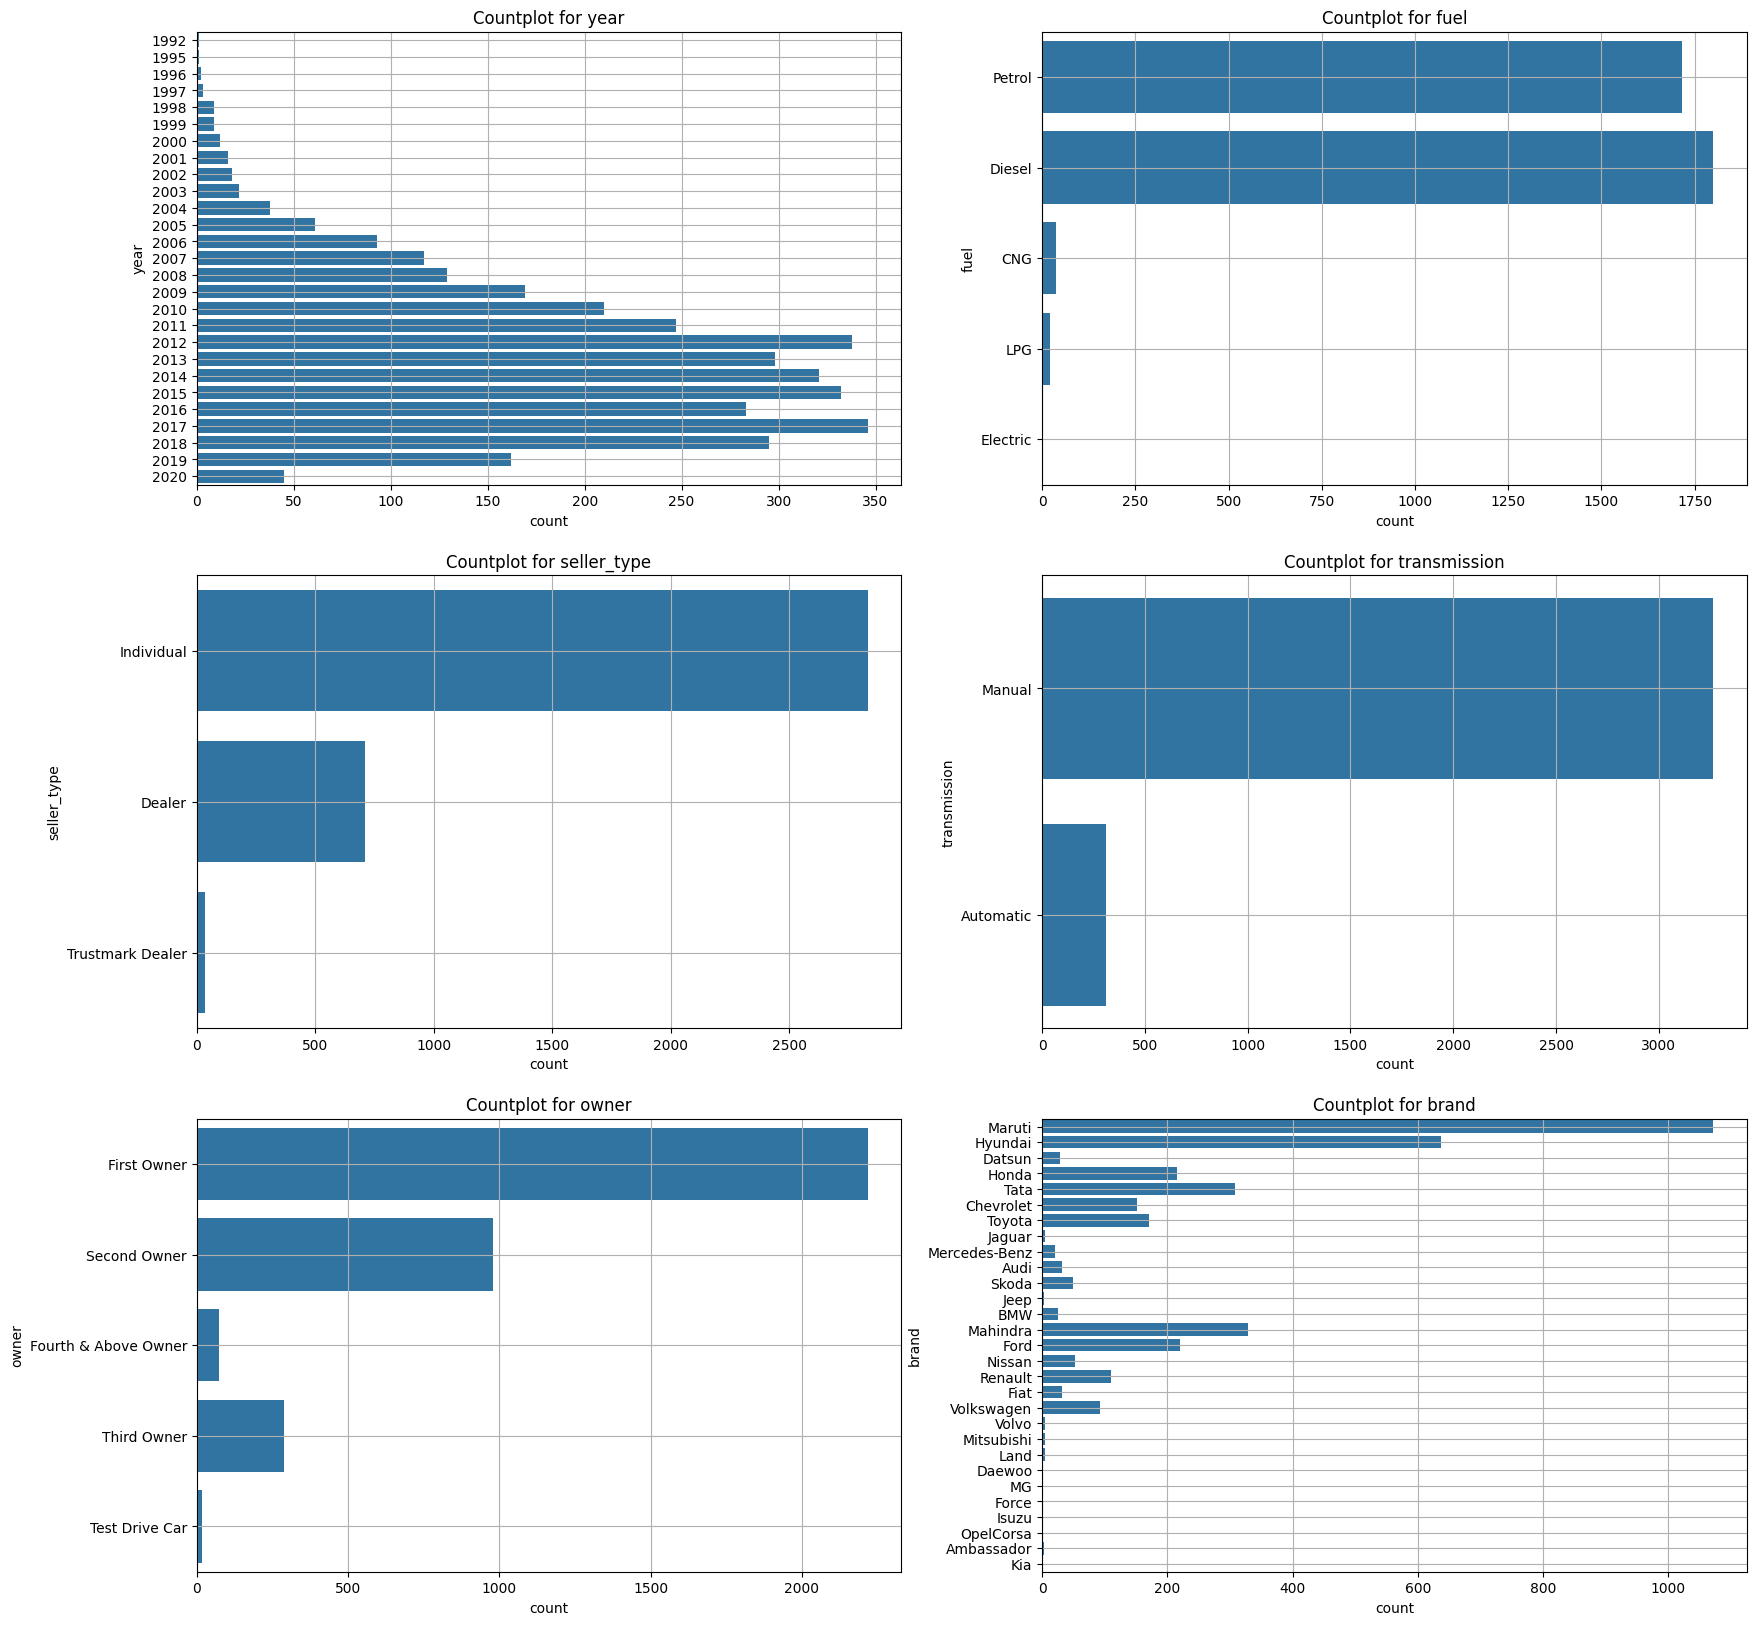

In [106]:
cols = ['year','fuel', 'seller_type',
       'transmission', 'owner', 'brand']

plt.figure(figsize=(20,20))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')
    plt.grid()

plt.show()

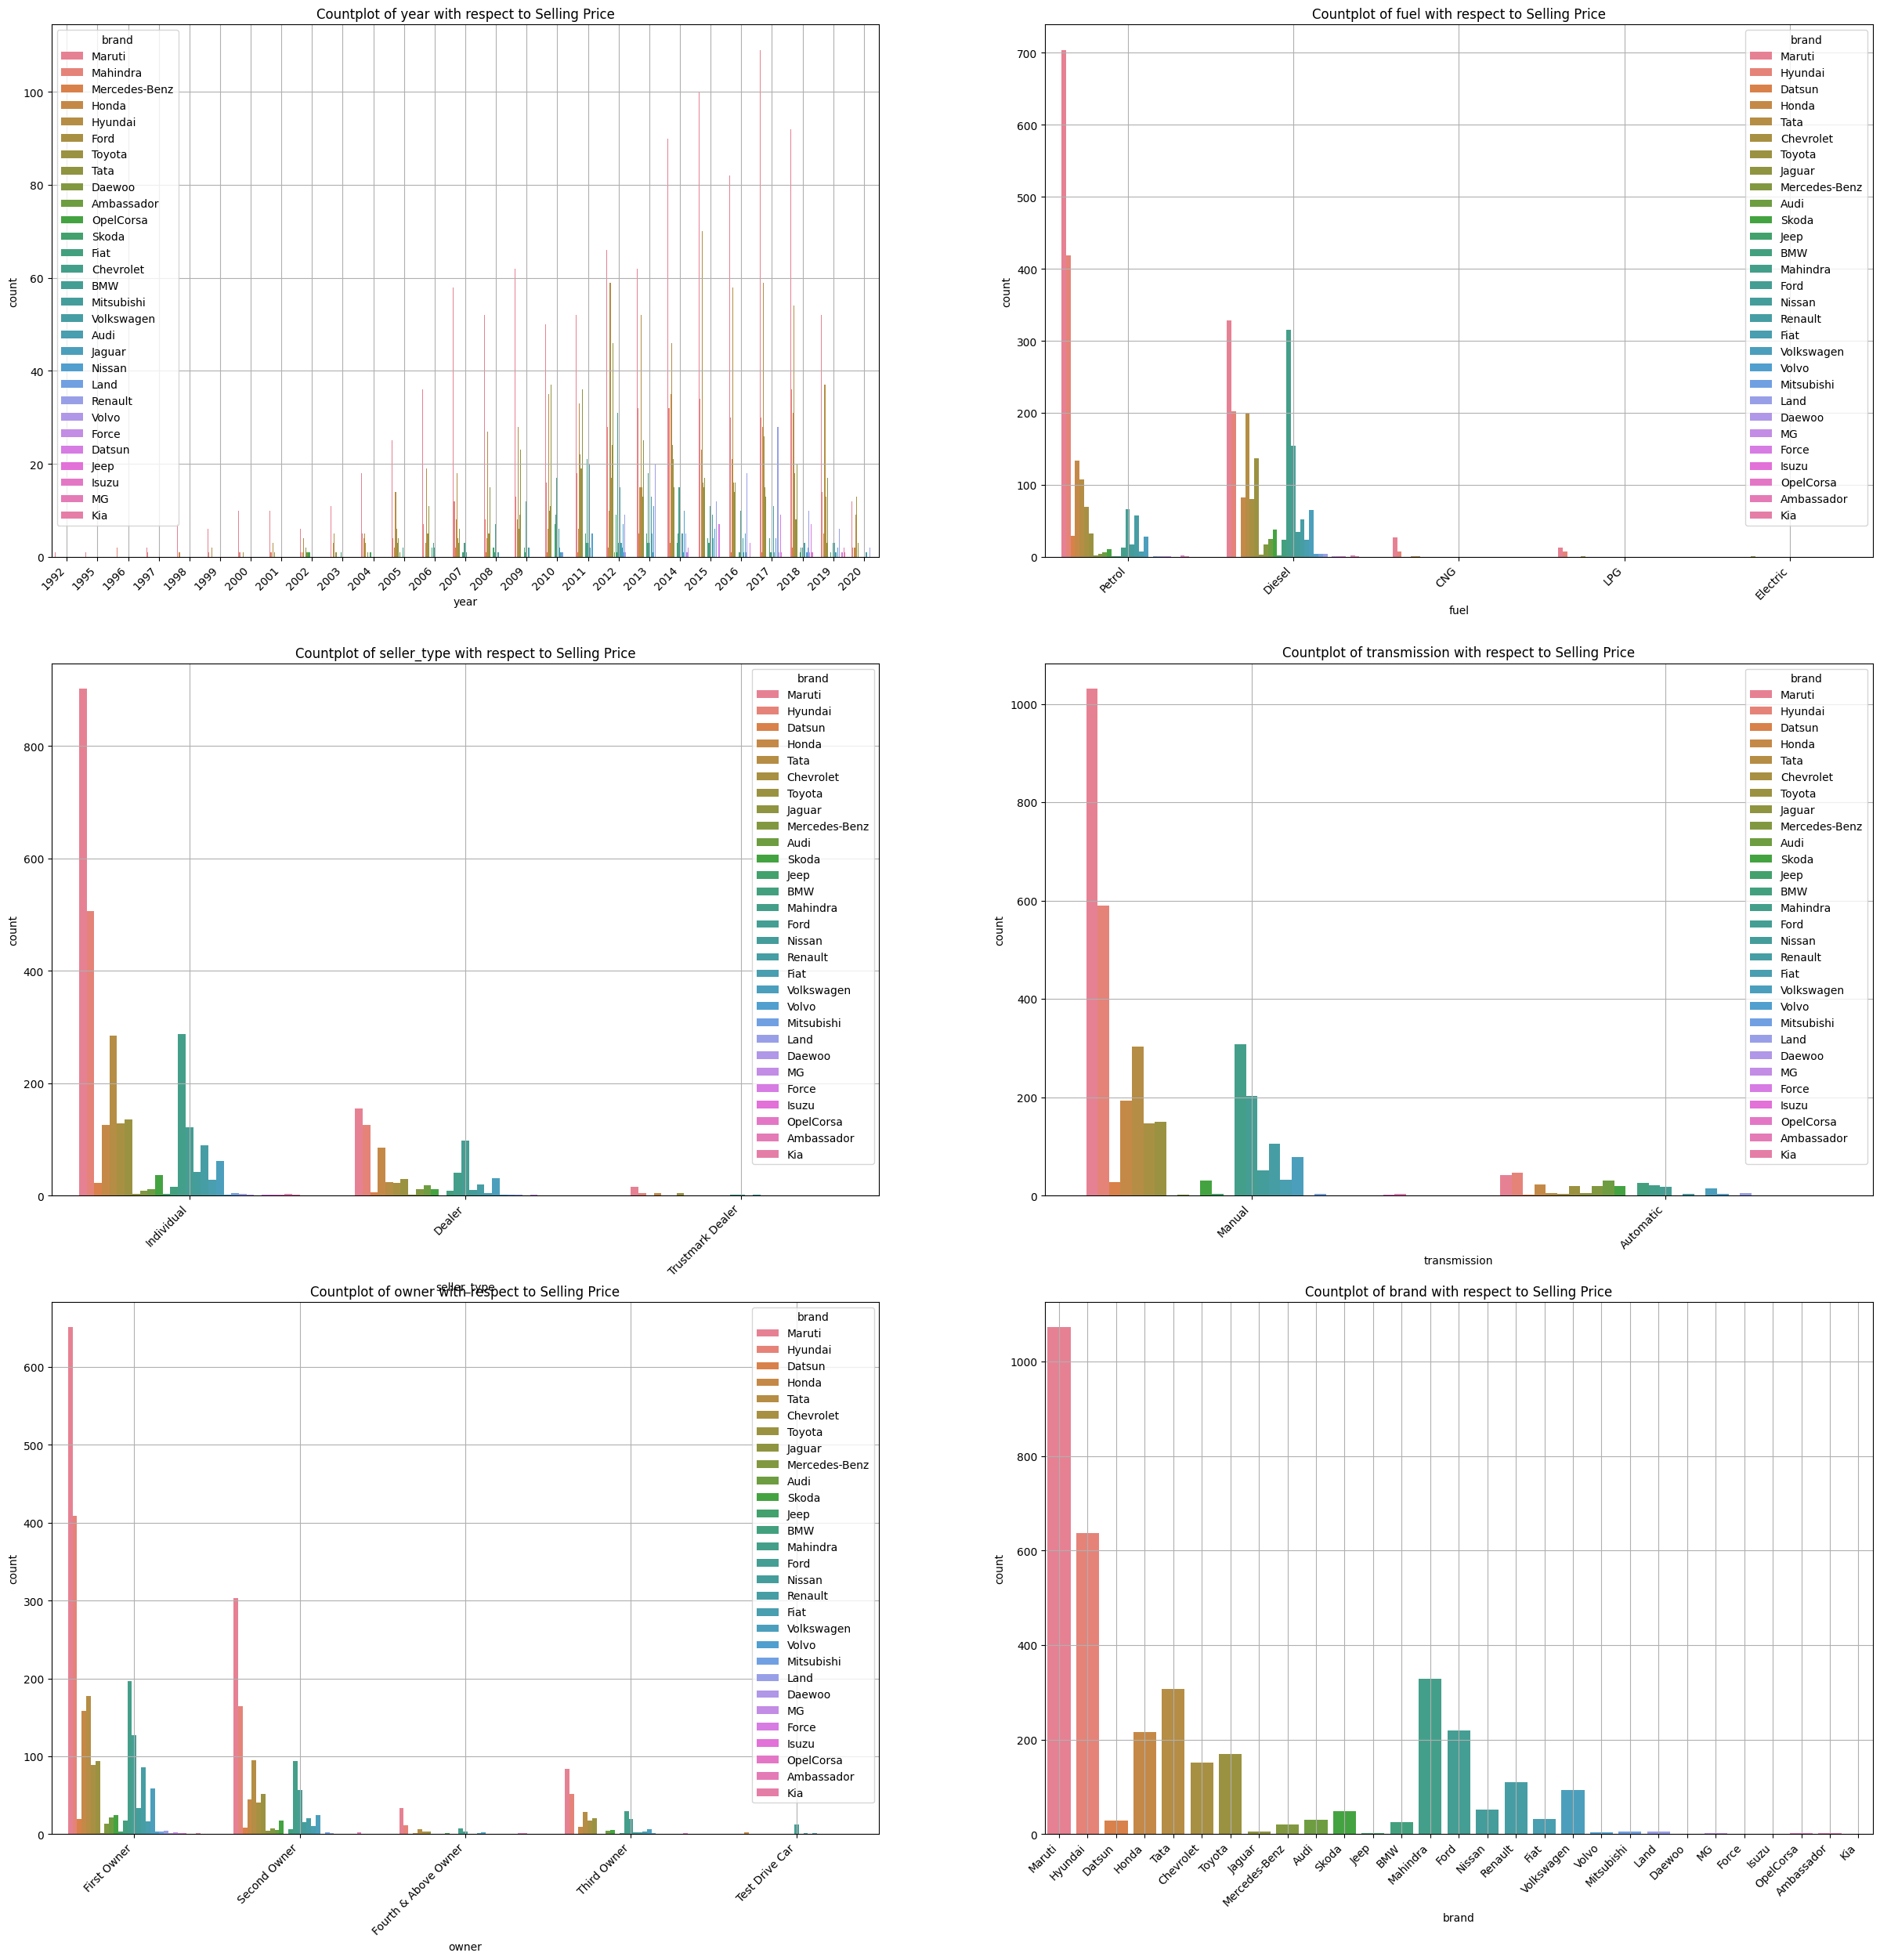

In [107]:
cols=['year','fuel','seller_type','transmission','owner','brand']
plt.figure(figsize=(30,30))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cols[i]],hue=df['brand'])
    plt.title(f'Countplot of {cols[i]} with respect to Selling Price')
    plt.xticks(rotation=45, ha='right')
    plt.grid()
plt.show()

In [108]:
d1 = df.groupby(df['fuel'])['selling_price'].mean()
d1

,selling_price
fuel,
CNG,273162.081081
Diesel,614001.075000
Electric,310000.000000
LPG,171818.136364
Petrol,335344.340128


In [109]:
df['selling_price'].mean()

473912.54207436397

In [110]:
d2 = d1.isin(d1 > df['selling_price'].mean())
d2

,selling_price
fuel,
CNG,False
Diesel,False
Electric,False
LPG,False
Petrol,False


In [111]:
d3 = df.groupby(df['seller_type'])['selling_price'].mean()
d3

,selling_price
seller_type,
Dealer,652699.390449
Individual,424904.024364
Trustmark Dealer,822272.727273


In [ ]:
d4 = d1.isin(d3>df['selling_price'].mean())
d4

fuel
CNG         False
Diesel      False
Electric    False
LPG         False
Petrol      False
Name: selling_price, dtype: bool

In [ ]:
c1 = df.groupby(df['transmission'])['selling_price'].mean()
c1

transmission
Automatic    1.274955e+06
Manual       3.973657e+05
Name: selling_price, dtype: float64

In [ ]:
c4=c1.isin(c1>df['selling_price'].mean())
c4

transmission
Automatic    False
Manual       False
Name: selling_price, dtype: bool

In [112]:
data = df.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand','model'], axis=1)
data.head()

,year,selling_price,km_driven,fuel_type,Type_of_Seller,Transmit,Owner_Type,brand_name,model_name
0,2007,60000,70000,4,1,1,0,18,6
1,2007,135000,50000,4,1,1,0,18,164
2,2012,600000,100000,1,1,1,0,10,161
3,2017,250000,46000,4,1,1,0,5,125
4,2014,450000,141000,1,1,1,2,9,17


In [113]:
data.dtypes

,0
year,int64
selling_price,int64
km_driven,int64
fuel_type,int64
Type_of_Seller,int64
Transmit,int64
Owner_Type,int64
brand_name,int64
model_name,int64


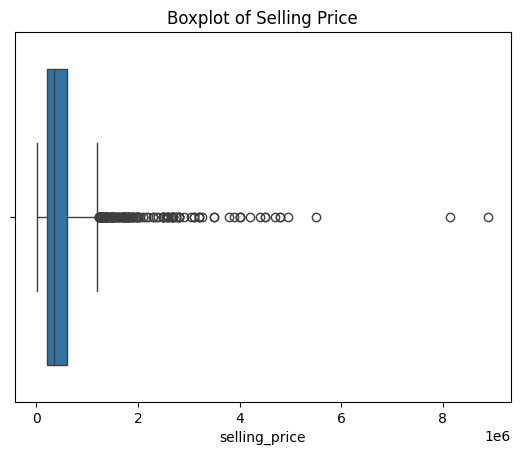

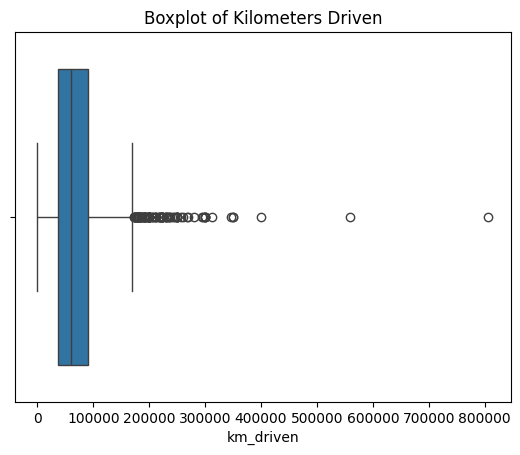

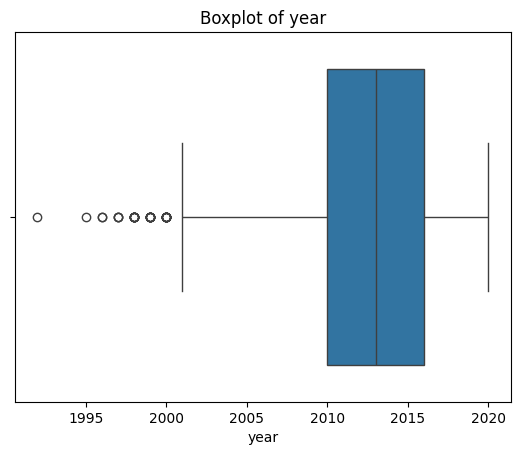

In [114]:
sns.boxplot(x=data['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()

sns.boxplot(x=data['km_driven'])
plt.title('Boxplot of Kilometers Driven')
plt.show()

sns.boxplot(x=data['year'])
plt.title('Boxplot of year')

plt.show()

In [115]:
def treatment_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [116]:
for i in num_cols:
    data = treatment_outliers(data, i)

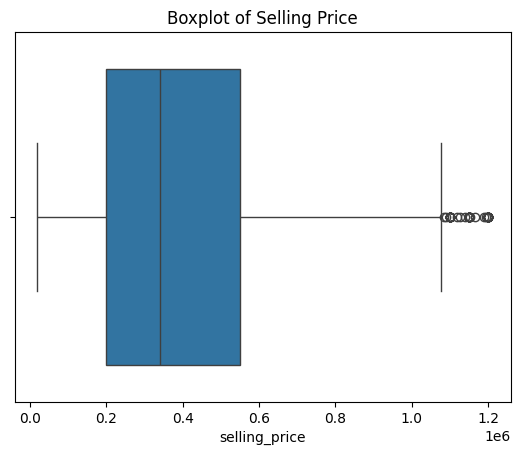

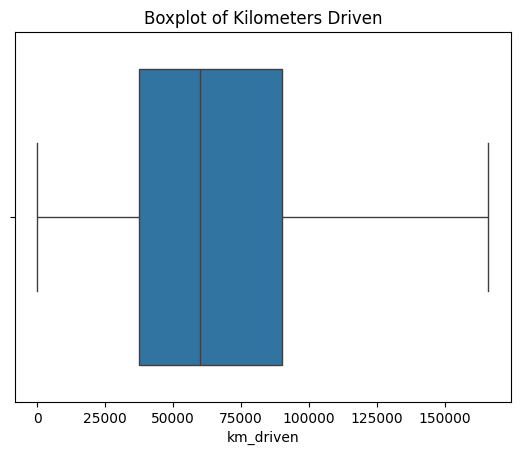

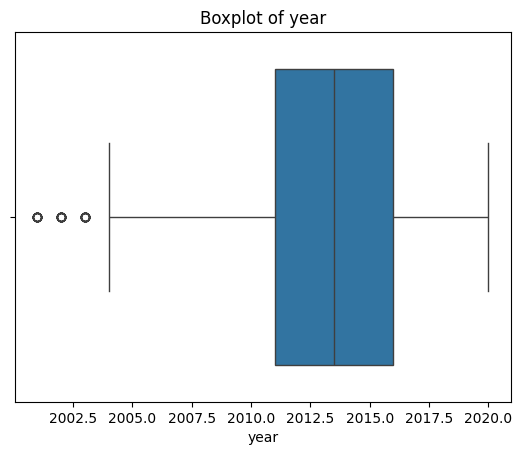

In [117]:
sns.boxplot(x=data['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()

sns.boxplot(x=data['km_driven'])
plt.title('Boxplot of Kilometers Driven')
plt.show()

sns.boxplot(x=data['year'])
plt.title('Boxplot of year')
plt.show()

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x = data.drop(columns=['selling_price'])
y = data['selling_price']

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2600, 8)
(2600,)
(650, 8)
(650,)


In [121]:
from sklearn.metrics import *

In [122]:
def eval_model(model,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'MAE':mae,
                       'MSE':mse,'RMSE':rmse},index=[mname])
    return res,ypred

In [123]:
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.neighbors import *
from xgboost import XGBRegressor

In [124]:
lr = LinearRegression()
lr_res,ypred_lr = eval_model(lr,'LinReg')
lr_res

,Train_R2,Test_R2,MAE,MSE,RMSE
LinReg,0.516628,0.530195,132100.592449,3.114462e+10,176478.388762


In [125]:
dt = DecisionTreeRegressor(max_depth=6,min_samples_split=8)
dt_res,ypred_dt = eval_model(dt,'DT_Reg')
dt_res

,Train_R2,Test_R2,MAE,MSE,RMSE
DT_Reg,0.688303,0.641265,111228.575154,2.378150e+10,154212.51036


In [126]:
knn = KNeighborsRegressor(n_neighbors=11)
knn_res,ypred_knn = eval_model(knn,'KNN_Reg')
knn_res

,Train_R2,Test_R2,MAE,MSE,RMSE
KNN_Reg,0.310396,0.23331,174572.090769,5.082592e+10,225446.053086


In [127]:
rf = RandomForestRegressor(n_estimators=80,max_depth=6,min_samples_split=8)
rf_res,ypred_rf = eval_model(rf,'RF_Reg')
rf_res

,Train_R2,Test_R2,MAE,MSE,RMSE
RF_Reg,0.723415,0.687275,104011.95491,2.073137e+10,143983.932509


In [128]:
rg = Ridge()
rg_res,y_pred_rg = eval_model(rg,'Ridge_reg')
rg_res

,Train_R2,Test_R2,MAE,MSE,RMSE
Ridge_reg,0.516626,0.530158,132107.951228,3.114709e+10,176485.380828


In [129]:
ls = Lasso()
ls_res,y_pred_rg = eval_model(ls,'Lasso_reg')
ls_res

,Train_R2,Test_R2,MAE,MSE,RMSE
Lasso_reg,0.516628,0.530194,132100.673656,3.114466e+10,176478.491726


In [130]:
all_res  = pd.concat([lr_res,dt_res,knn_res,rf_res,rg_res,ls_res])
all_res

,Train_R2,Test_R2,MAE,MSE,RMSE
LinReg,0.516628,0.530195,132100.592449,3.114462e+10,176478.388762
DT_Reg,0.688303,0.641265,111228.575154,2.378150e+10,154212.510360
KNN_Reg,0.310396,0.233310,174572.090769,5.082592e+10,225446.053086
RF_Reg,0.723415,0.687275,104011.954910,2.073137e+10,143983.932509
Ridge_reg,0.516626,0.530158,132107.951228,3.114709e+10,176485.380828
Lasso_reg,0.516628,0.530194,132100.673656,3.114466e+10,176478.491726


In [131]:
import pickle
import joblib

In [132]:
pickle.dump(rf,open('Best_Model_1.pkl','wb'))
pickle.dump(dt,open('Best_model_2.pkl','wb'))

In [133]:
load_model=joblib.load('Best_Model_1.pkl')

In [134]:
random_indices = np.random.choice(data.index, size= 20, replace=False)
sample_data_20 = data.loc[random_indices]
sample_data_20

,year,selling_price,km_driven,fuel_type,Type_of_Seller,Transmit,Owner_Type,brand_name,model_name
119,2014,555000,90000,1,1,1,2,17,138
3406,2015,490000,70000,1,1,1,0,21,150
3808,2018,550000,63000,4,1,1,0,18,26
479,2018,270000,19000,4,1,1,2,5,72
1910,2016,875000,74000,1,1,0,0,10,44
3114,2009,110000,110000,4,1,1,1,18,7
3060,2011,220000,70000,4,1,1,2,18,14
1616,2017,650000,6480,4,2,1,0,26,61
194,2010,170000,90000,1,1,1,4,8,65
4063,2017,440000,14100,0,0,1,0,18,53


In [135]:
sample_data=sample_data_20.drop('selling_price', axis=1)

In [136]:
Sample_pred = load_model.predict(sample_data)
Sample_pred

array([474935.14446696, 526670.98834632, 570879.86794762, 435474.48728761,
       876137.5476914 , 170828.13291463, 191430.44932657, 547523.44008921,
       236326.6805607 , 510147.00239677, 401153.73997647, 573633.35009048,
       502316.96529046, 334262.92684819, 707299.37272393, 539311.72201936,
       496833.42748067, 483160.81409055, 561437.52254606, 741027.90238592])

In [152]:
Prediction_sample = pd.DataFrame(Sample_pred)
Prediction_sample


,0
0,474935.144467
1,526670.988346
2,570879.867948
3,435474.487288
4,876137.547691
5,170828.132915
6,191430.449327
7,547523.440089
8,236326.680561
9,510147.002397


In [150]:
print(sample_data_20[['selling_price', 'year']])

      selling_price  year
119          555000  2014
3406         490000  2015
3808         550000  2018
479          270000  2018
1910         875000  2016
3114         110000  2009
3060         220000  2011
1616         650000  2017
194          170000  2010
4063         440000  2017
1348         550000  2012
516          556000  2019
3911         900000  2017
1222         260000  2013
1776         746000  2020
4199         550000  2015
1200         450000  2017
1037         725000  2016
3739         725000  2011
1905         600000  2017


In [154]:
sample_data_20['pred_selling_price']=Prediction_sample.values
sample_data_20

,year,selling_price,km_driven,fuel_type,Type_of_Seller,Transmit,Owner_Type,brand_name,model_name,pred_selling_price
119,2014,555000,90000,1,1,1,2,17,138,474935.144467
3406,2015,490000,70000,1,1,1,0,21,150,526670.988346
3808,2018,550000,63000,4,1,1,0,18,26,570879.867948
479,2018,270000,19000,4,1,1,2,5,72,435474.487288
1910,2016,875000,74000,1,1,0,0,10,44,876137.547691
3114,2009,110000,110000,4,1,1,1,18,7,170828.132915
3060,2011,220000,70000,4,1,1,2,18,14,191430.449327
1616,2017,650000,6480,4,2,1,0,26,61,547523.440089
194,2010,170000,90000,1,1,1,4,8,65,236326.680561
4063,2017,440000,14100,0,0,1,0,18,53,510147.002397


In [156]:
com = (sample_data_20[['selling_price', 'pred_selling_price']])
com.to_csv('sample_prediction.csv')
com

,selling_price,pred_selling_price
119,555000,474935.144467
3406,490000,526670.988346
3808,550000,570879.867948
479,270000,435474.487288
1910,875000,876137.547691
3114,110000,170828.132915
3060,220000,191430.449327
1616,650000,547523.440089
194,170000,236326.680561
4063,440000,510147.002397
